## Importo Librerias
Importo las librerias a utilizar.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Los datos

Empecemos trayendo los datos que vamos a analizar de diabetes_dataset.csv. 

In [3]:
diabetes = pd.read_csv('Pp1-Trabajo Inicial- Parte1\diabetes_dataset.csv')

Chequeo que los datos se hayan importado bien.

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Analisis de datos exploratorio

Primero chequeo si hay algun dato faltante.

## Datos faltantes

Uso seaborn para crear un simple heatmap para ver donde hay datos faltantes.
Como se puede ver no falta ningun dato.

<AxesSubplot:>

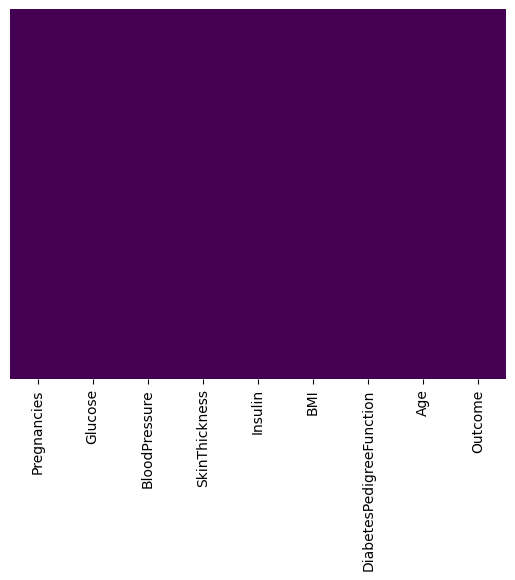

In [5]:
sns.heatmap(diabetes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Datos duplicados.

Chequeo si hay datos duplicados. 

In [6]:
diabetes.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

<AxesSubplot:xlabel='Outcome', ylabel='count'>

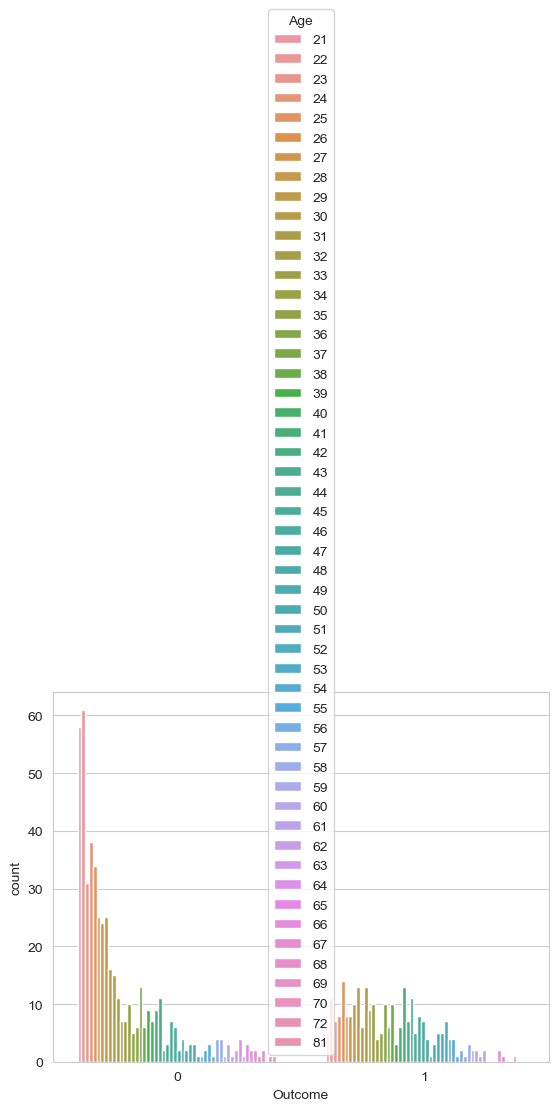

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',hue='Age',data=diabetes)

Verifico la cantidad la edad por representacion 

c:\Users\Nahuel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

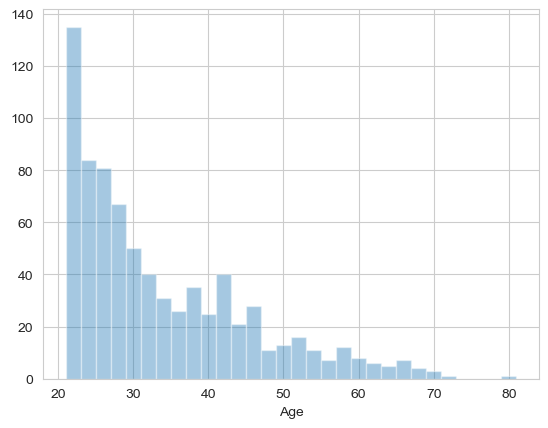

In [8]:
sns.distplot(diabetes['Age'],kde=False,bins=30)

Si se quiere se puede usar solo pandas para hacer esto mismo.

<AxesSubplot:ylabel='Frequency'>

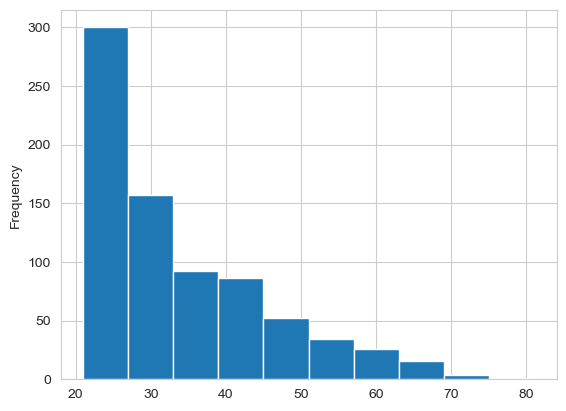

In [9]:
diabetes['Age'].plot.hist()

Mientras la edad avanza hay menor representacion.

Lo mejor va  a ser agrupar los datos de la edad de 20 a 30, de 30 a 40, de 40 a 50 y de 60 a 80. Siendo que de 60 en adelantes son muy pocos los datos es mejor agruaparlo para tener un dato mas acertado.

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

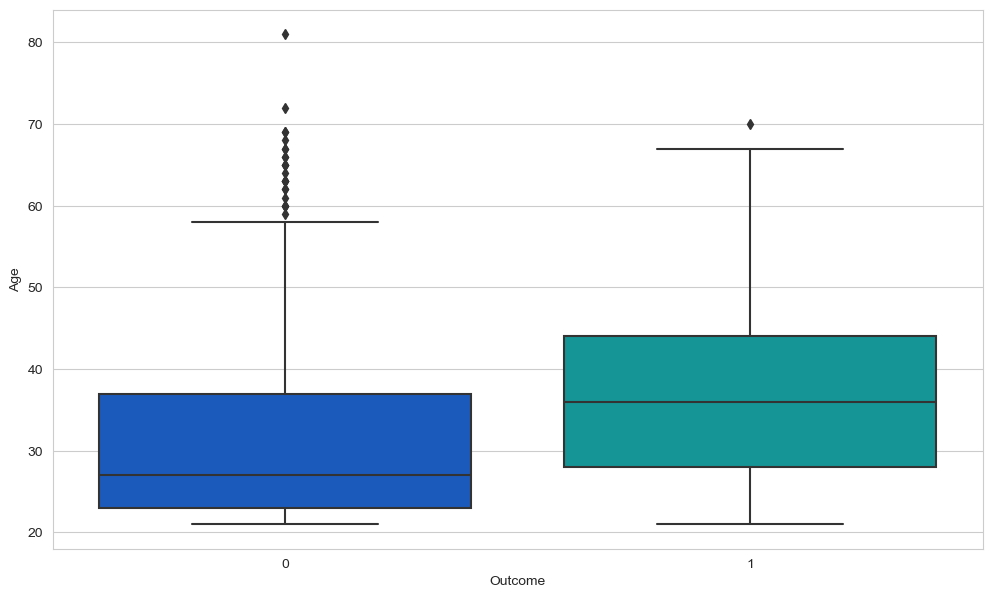

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Outcome',y='Age',data=diabetes,palette='winter')

En este boxplot podemos ver que de los datos que tenemos las mayoria de las mujeres en sus 20-medios tienden a no tener diabetes mientras que las mas afectadas por las diabetes tienden a estar en sus 30-medios.

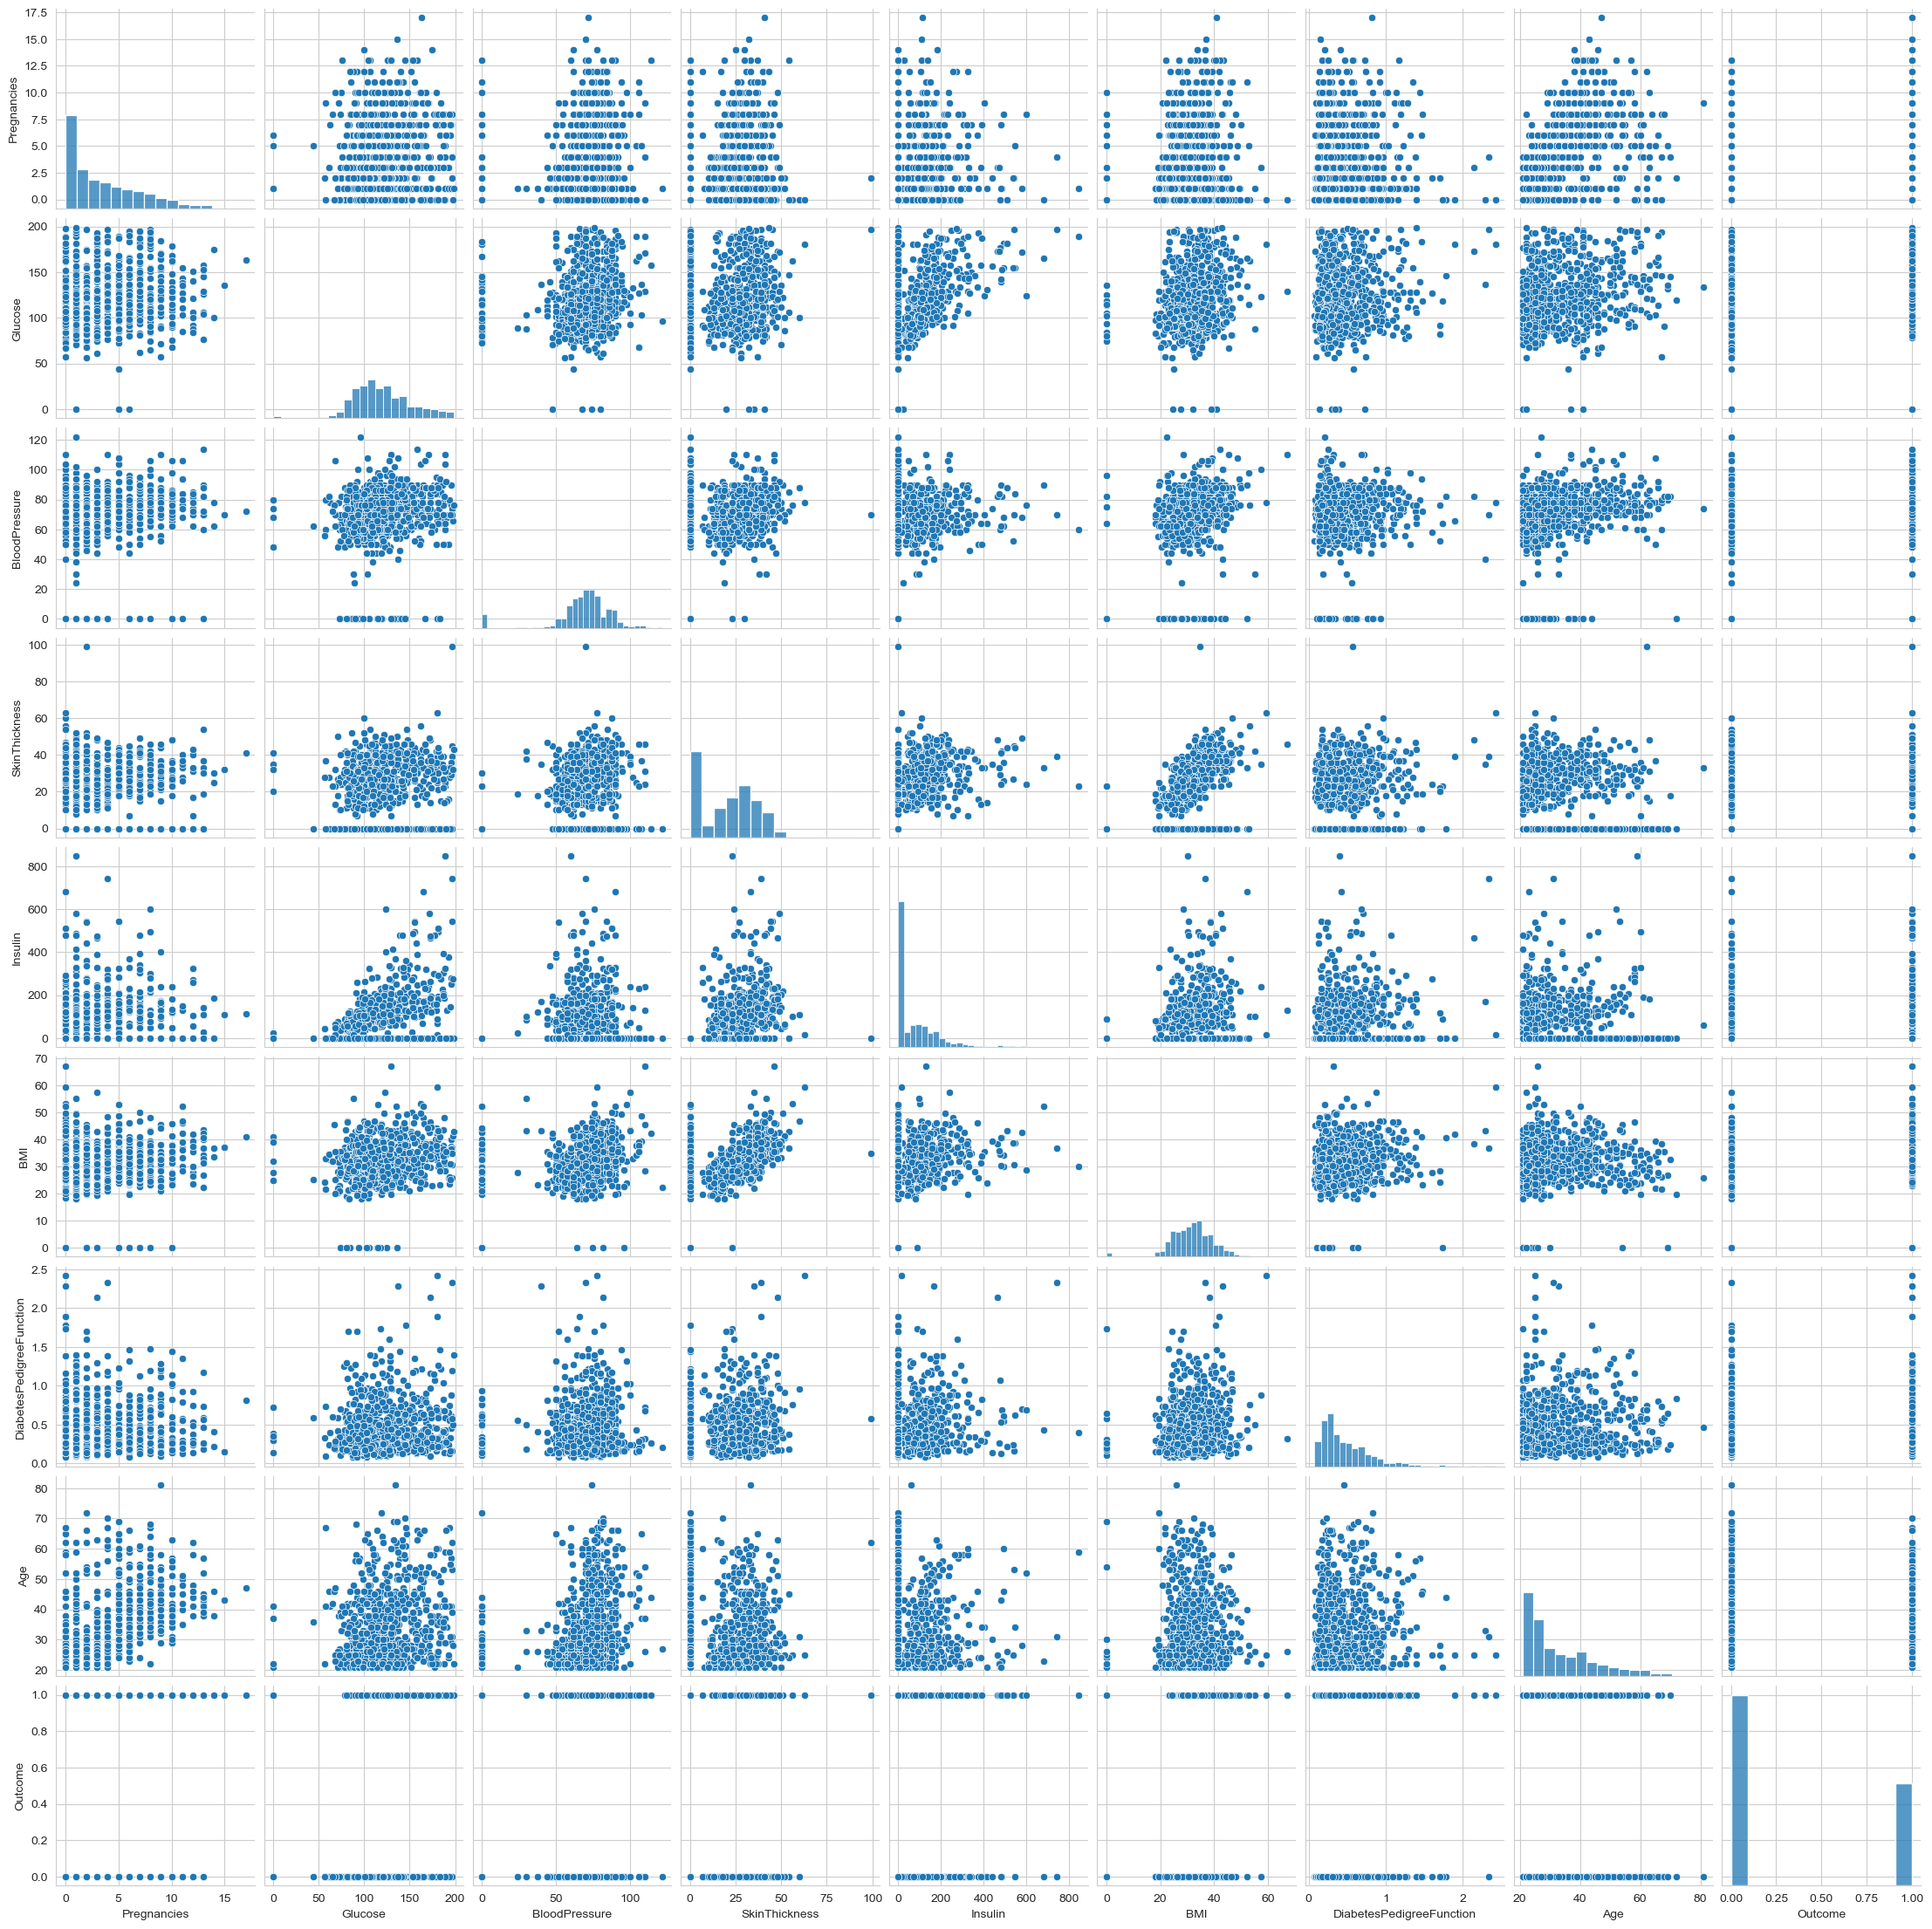

In [11]:
sns.pairplot(diabetes)

Este pairplot informa como estan relacionados cada uno de los datos con los demas datos.

<AxesSubplot:>

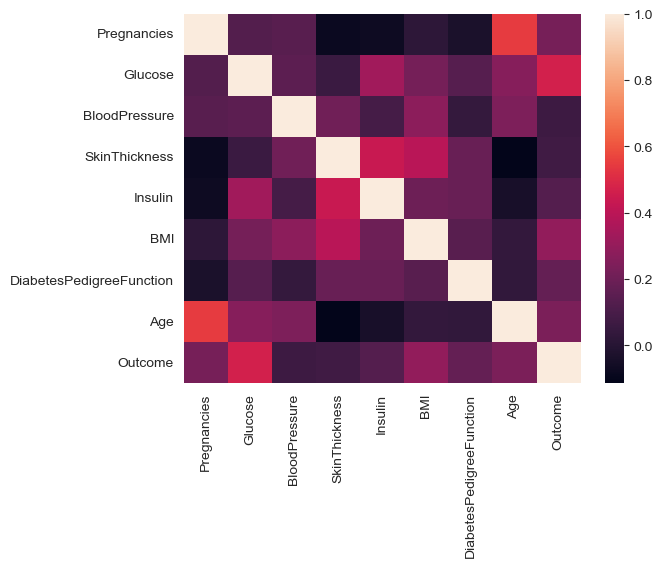

In [12]:
sns.heatmap(diabetes.corr())

Este heatmap muestra la correlación entre los datos.

In [13]:
'''def change_age(col):
    Age = col[0]
    
    if Age <30:
        return 20

    elif Age < 40:
        return 30

    elif Age < 50:
        return 40
    
    elif Age < 60:
        return 50
    else:
        return 60'''

'def change_age(col):\n    Age = col[0]\n    \n    if Age <30:\n        return 20\n\n    elif Age < 40:\n        return 30\n\n    elif Age < 50:\n        return 40\n    \n    elif Age < 60:\n        return 50\n    else:\n        return 60'

In [14]:
#diabetes['Age'] = diabetes[['Age']].apply(change_age,axis=1)

<AxesSubplot:ylabel='Frequency'>

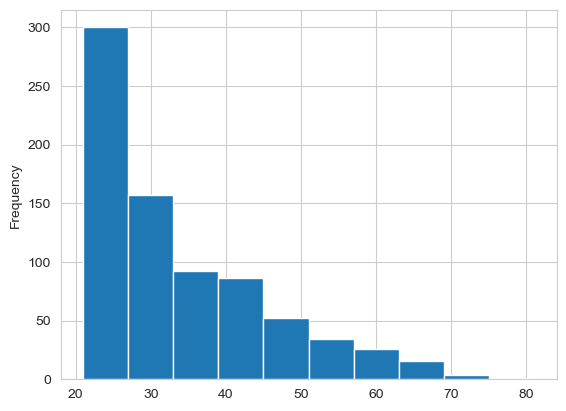

In [15]:
diabetes['Age'].plot.hist()

Asi logre agrupar todos los datos por edad hasta los 60 años.

In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:ylabel='Frequency'>

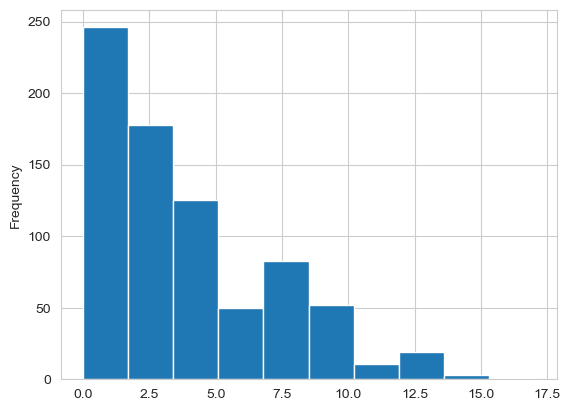

In [17]:
diabetes['Pregnancies'].plot.hist()

In [18]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
'''rangos_edad = [20,30,40,50,60]

datos_prevalencia = []
for edad in rangos_edad:
    filtro_edad= (diabetes['Age'] == edad)
    individuos = filtro_edad.sum()
    contador_diabetes = diabetes.loc[filtro_edad, 'Outcome'].sum()
    prevalencia= contador_diabetes / individuos
    datos_prevalencia.append({'Rango de edad': 'edad', 'Prevalencia': prevalencia})
    
prevalencia_df = pd.DataFrame(datos_prevalencia)


print(prevalencia_df)'''
    

"rangos_edad = [20,30,40,50,60]\n\ndatos_prevalencia = []\nfor edad in rangos_edad:\n    filtro_edad= (diabetes['Age'] == edad)\n    individuos = filtro_edad.sum()\n    contador_diabetes = diabetes.loc[filtro_edad, 'Outcome'].sum()\n    prevalencia= contador_diabetes / individuos\n    datos_prevalencia.append({'Rango de edad': 'edad', 'Prevalencia': prevalencia})\n    \nprevalencia_df = pd.DataFrame(datos_prevalencia)\n\n\nprint(prevalencia_df)"

Analizo la prevalencia en los rangos de edad marcados.

In [20]:
diabetes.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [21]:
#from sklearn.linear_model import LinearRegression

#X = prevalencia[['edad']]
#y = prevalencia_df['Prevalencia']


#model = LinearRegression()
#model.fit(X, y)


#predicted_prevalence = model.predict(X)


#plt.scatter(X, y, label='Actual Prevalence')
#plt.plot(X, predicted_prevalence, color='red', label='Regression Line')
#plt.xlabel('Age')
#plt.ylabel('Prevalence')
#plt.title('Linear Regression of Prevalence vs. Age')
#plt.legend()
#plt.show()#/

Regresion Lineal falla por por missmatch entre la cantidad de datos.

Decidimos cambiar el enfoque, por que no podemos predecir la prevalencia y por que desperdiciamos muchos datos.

In [22]:
diabetes_df = diabetes[diabetes['Outcome'] == 1]
no_diabetes_df = diabetes[diabetes['Outcome'] == 0]

In [23]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [24]:
no_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


Cambiamos el enfoque por que va mas alla de nuestras posibilidades de lo que podemos lograr en el tiempo estimado.
Por lo que decidimos clasificar con machine learning si una persona tiene diabetes o no dependiendo de los datos. 

Primero probamos con Regresion Logistica (Logistic Regression)

Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[79 20]
 [18 37]]


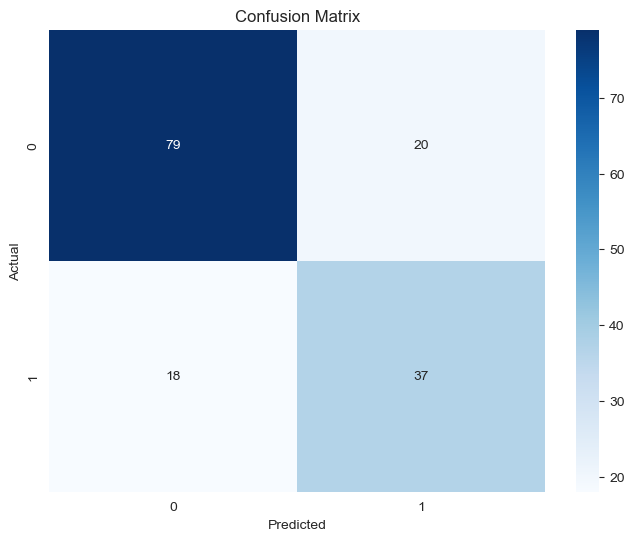

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv("Pp1-Trabajo Inicial- Parte1\diabetes_dataset.csv")

# Dividir los datos en características (X) y resultados (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Ahora probamos con Random Forest Classifier para ver si mejora la clasificacion.

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




X = diabetes.drop(columns=['Outcome','Pregnancies','SkinThickness' ])
y = diabetes['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

Confusion Matrix:
[[78 21]
 [16 39]]


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Model Accuracy: 0.7792207792207793


In [32]:
X = diabetes.drop(columns=['Outcome','Pregnancies','SkinThickness' ])
y = diabetes['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_leaf=4,min_samples_split=10,random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7792207792207793
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
[[81 18]
 [16 39]]


Como se ve mejora el acuracy pero por un porcentaje infimo.

Como ultimo se prueba el modelo de SVC (Support Vector Classifier).

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns=['Outcome','Pregnancies','SkinThickness' ])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
[[84 15]
 [18 37]]


Como se ve la accuracy da mejor resultado con SVC que con los otros modelos de clasificacion.
Le aplico el cross validation.

In [33]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)  

print("\nCross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Scores: [0.75974026 0.69480519 0.76623377 0.83660131 0.77777778]
Mean Accuracy: 0.7670316611493082
Standard Deviation: 0.04522361835173659

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
[[81 18]
 [16 39]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


X = diabetes.drop(columns=['Outcome','Pregnancies','SkinThickness'])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Prediccion con los mejores modelos
y_pred = best_model.predict(X_test)

#Calculo el acuracy con los hyper parametros elegidos.
accuracy = accuracy_score(y_test, y_pred)
print("Mejores Hyperparametros:", best_params)
print("Mejor Modelo Accuracy:", accuracy)
print("\nReporte de Clasificacion:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

El uso que le quiero dar a al codigo anterior es conseguir los mejores hiperparametros para analizar pero no logro terminar de usarlo ya que toma mucho tiempo.
Pero la idea general es que mejores el performance.